<a href="https://colab.research.google.com/github/AlePeraDev/Challenge_Data_Science_1/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [3]:
import pandas as pd

import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



La facturación de la tienda 1 es: $1,150,880,400M
La facturación de la tienda 2 es: $1,116,343,500M
La facturación de la tienda 3 es: $1,098,019,600M
La facturación de la tienda 4 es: $1,038,375,700M


<function matplotlib.pyplot.show(close=None, block=None)>

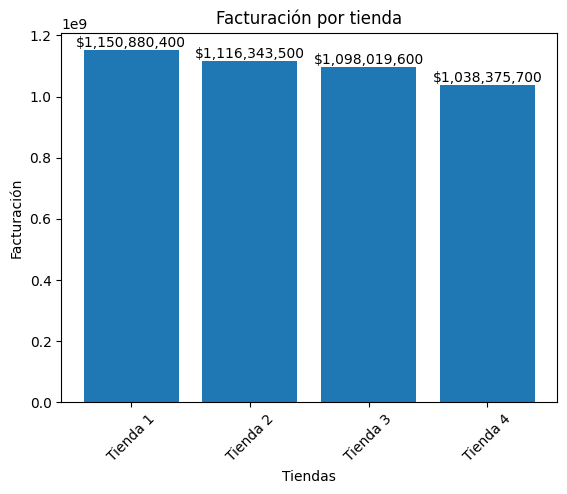

In [4]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

def leer_csv(url):
  datos = []
  with urlopen(url) as respuesta:
    lienas = respuesta.read().decode('utf-8').splitlines()
    lector = csv.DirectReader(lineas)
    for fila in lector:
        datos.append(fila)
  return datos


#Sumatoría de la facturación correspondiente a cada tienda


facturacion_tienda1 = tienda["Precio"].astype(float).sum()
facturacion_tienda2 = tienda2["Precio"].astype(float).sum()
facturacion_tienda3 = tienda3["Precio"].astype(float).sum()
facturacion_tienda4 = tienda4["Precio"].astype(float).sum()

print(f"La facturación de la tienda 1 es: ${facturacion_tienda1:,.0f}M")
print(f"La facturación de la tienda 2 es: ${facturacion_tienda2:,.0f}M")
print(f"La facturación de la tienda 3 es: ${facturacion_tienda3:,.0f}M")
print(f"La facturación de la tienda 4 es: ${facturacion_tienda4:,.0f}M")



tiendas = ("Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4")
facturacion = (facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4)

plt.bar(x= tiendas, height=facturacion)
plt.xticks(rotation=45)
plt.title("Facturación por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Facturación")

for i in range(len(tiendas)):
    plt.text(i, facturacion[i], f"${facturacion[i]:,.0f}", ha="center", va="bottom")
plt.show



# 2. Ventas por categoría

In [5]:

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

#Diccionario ventas por categoría
ventas_por_categoria = {}

# Procesar topdas las tiendas
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    print(f"\nVentas por categoría en Tienda {i+1}:")

    # Diccionario para la tienda actual
    categorias_tienda = {}

    for venta in datos_tienda:
        categoria = venta ['Categoría del Producto']
        precio = float(venta['Precio'])
        cantidad = int(venta['Cantidad de cuotas'])
        monto_venta = precio * cantidad

        # Agregar al diccionario de la tienda actual
        if categoria in categorias_tienda:
          categorias_tienda[categoria] += monto_venta
        else:
          categorias_tienda[categoria] = monto_venta

       #Agregar al diccionario general
        if categoria in ventas_por_categoria:
            ventas_por_categoria[categoria] += monto_venta
        else:
            ventas_por_categoria[categoria] = monto_venta

    # Mostrar resultados para esta tienda
    for categoria, monto in categorias_tienda.items():
        print(f" {categoria}: ${monto:.2f}")
#Mostrar resultados totales
print("\nVentas totales por categoría (todas las tiendas):")
for categoria, monto in ventas_por_categoria.items():
    print(f" {categoria}: ${monto:.2f}")

# Calcular el total general
total_general = sum(ventas_por_categoria.values())
print(f"\nTotal general de ventas: ${total_general:.2f}")






Ventas por categoría en Tienda 1:
 Electrónicos: $1290390700.00
 Muebles: $582928200.00
 Juguetes: $49062800.00
 Electrodomésticos: $1032375600.00
 Artículos para el hogar: $38316800.00
 Deportes y diversión: $126883700.00
 Libros: $25769400.00
 Instrumentos musicales: $276990500.00

Ventas por categoría en Tienda 2:
 Muebles: $527332100.00
 Instrumentos musicales: $294448700.00
 Deportes y diversión: $81660600.00
 Electrónicos: $1286643600.00
 Artículos para el hogar: $42739700.00
 Juguetes: $46721200.00
 Electrodomésticos: $1026226300.00
 Libros: $31417000.00

Ventas por categoría en Tienda 3:
 Electrodomésticos: $1081380800.00
 Muebles: $555092500.00
 Instrumentos musicales: $250336000.00
 Deportes y diversión: $123399200.00
 Electrónicos: $1101334500.00
 Juguetes: $61190400.00
 Artículos para el hogar: $44724600.00
 Libros: $26358900.00

Ventas por categoría en Tienda 4:
 Electrodomésticos: $879089600.00
 Muebles: $556628000.00
 Deportes y diversión: $100062000.00
 Libros: $295434

In [6]:
# Función para calcular y mostrar las ventas por categoría de una tienda
def ventas_por_categoria(tienda, numero):
    ventas = tienda.groupby('Categoría del Producto')['Precio'].sum()
    print(f"\nVentas por categoría en tienda {numero}:")
    print(ventas)
#Mostrar resultados para cada tienda
ventas_por_categoria(tienda, 1)
ventas_por_categoria(tienda, 2)
ventas_por_categoria(tienda, 3)
ventas_por_categoria(tienda, 4)


Ventas por categoría en tienda 1:
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Ventas por categoría en tienda 2:
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Ventas por categoría en tienda 3:
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               

# 3. Calificación promedio de la tienda


In [7]:
#leemos nuestro archivo csv
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        #Decodificamos los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DirectReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos
import pandas as pd
import csv
from urllib.request import urlopen



def clasificacion_promedio(df, numero_tienda):
    """
    Calcula la calificación promedio de una tienda, manejando errores de conversión.

    Args:
        df (pd.DataFrame): DataFrame con los datos de la tienda.
        numero_tienda (int): Número de la tienda.
    """
    calificaciones_validas = []
    for calificacion_str in df['Calificación']:
        try:
            # Intentar convertir a número flotante
            calificacion_float = float(calificacion_str)
            calificaciones_validas.append(calificacion_float)
        except ValueError:
            # Manejar el error si no se puede convertir a número
            print(f"Advertencia: La calificación '{calificacion_str}' en la Tienda {numero_tienda} no es numérica y será ignorada.")
        except TypeError:
             # Manejar el error si el valor es None o no es una cadena
            print(f"Advertencia: La calificación '{calificacion_str}' en la Tienda {numero_tienda} no es válida y será ignorada.")


    if calificaciones_validas:
        promedio = sum(calificaciones_validas) / len(calificaciones_validas)
        print(f"Clasificación promedio en Tienda {numero_tienda}: {promedio:.2f}")
    else:
        print(f"No hay calificaciones numéricas válidas en la Tienda {numero_tienda}.")

# Mostrar resultados para cada tienda
clasificacion_promedio(tienda, 1)
clasificacion_promedio(tienda2, 2)
clasificacion_promedio(tienda3, 3)
clasificacion_promedio(tienda4, 4)



Clasificación promedio en Tienda 1: 3.98
Clasificación promedio en Tienda 2: 4.04
Clasificación promedio en Tienda 3: 4.05
Clasificación promedio en Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [8]:

# 4. Productos más y menos vendidos

def productos_vendidos(df, numero_tienda):
    """
    Clasifica y muestra los productos más y menos vendidos de una tienda.

    Args:
        df (pd.DataFrame): DataFrame con los datos de la tienda.
        numero_tienda (int): Número de la tienda.
    """
    # Agrupar por producto y sumar la cantidad vendida
    ventas_por_producto = df.groupby('Producto')['Precio'].sum()

    print(f"\n--- Productos más y menos vendidos en Tienda {numero_tienda} ---")

    # Productos más vendidos (orden descendente)
    productos_mas_vendidos = ventas_por_producto.sort_values(ascending=False)
    print("\nProductos más vendidos:")
    print(productos_mas_vendidos.head(3)) # Mostrar los 10 productos más vendidos

    # Productos menos vendidos (orden ascendente)
    productos_menos_vendidos = ventas_por_producto.sort_values(ascending=True)
    print("\nProductos menos vendidos:")
    print(productos_menos_vendidos.head(3)) # Mostrar los 10 productos menos vendidos

# Aplicar la función a cada tienda
productos_vendidos(tienda, 1)
productos_vendidos(tienda2, 2)
productos_vendidos(tienda3, 3)
productos_vendidos(tienda4, 4)


--- Productos más y menos vendidos en Tienda 1 ---

Productos más vendidos:
Producto
TV LED UHD 4K    142150200.0
Refrigerador     112143300.0
Iphone 15         97902200.0
Name: Precio, dtype: float64

Productos menos vendidos:
Producto
Cuerda para saltar    652800.0
Dinosaurio Rex        688900.0
Cubo mágico 8x8       696900.0
Name: Precio, dtype: float64

--- Productos más y menos vendidos en Tienda 2 ---

Productos más vendidos:
Producto
Iphone 15        113225800.0
TV LED UHD 4K    103375000.0
Refrigerador      97632500.0
Name: Precio, dtype: float64

Productos menos vendidos:
Producto
Cubo mágico 8x8       643600.0
Dinosaurio Rex        770300.0
Cuerda para saltar    856900.0
Name: Precio, dtype: float64

--- Productos más y menos vendidos en Tienda 3 ---

Productos más vendidos:
Producto
Refrigerador     99889700.0
TV LED UHD 4K    96669100.0
Iphone 15        93225700.0
Name: Precio, dtype: float64

Productos menos vendidos:
Producto
Cubo mágico 8x8       640400.0
Dinosaurio Rex

# 5. Envío promedio por tienda

In [9]:


def envio_promedio(df, numero_tienda):
    """
    Calcula y muestra el costo de envío promedio de una tienda.

    Args:
        df (pd.DataFrame): DataFrame con los datos de la tienda.
        numero_tienda (int): Número de la tienda.
    """
    # Verificar si la columna 'Costo de envío' existe
    if 'Costo de envío' in df.columns:
        # Calcular el promedio de la columna 'Costo de envío'
        promedio_envio = df['Costo de envío'].mean()
        print(f"Costo de envío promedio en Tienda {numero_tienda}: ${promedio_envio:.2f}")
    else:
        print(f"La columna 'Costo de Envío' no se encontró en el DataFrame de la Tienda {numero_tienda}.")

# Aplicar la función a cada tienda
envio_promedio(tienda, 1)
envio_promedio(tienda2, 2)
envio_promedio(tienda3, 3)
envio_promedio(tienda4, 4)


Costo de envío promedio en Tienda 1: $26018.61
Costo de envío promedio en Tienda 2: $25216.24
Costo de envío promedio en Tienda 3: $24805.68
Costo de envío promedio en Tienda 4: $23459.46


In [10]:
print(tienda['Costo de envío'].dtype)

float64


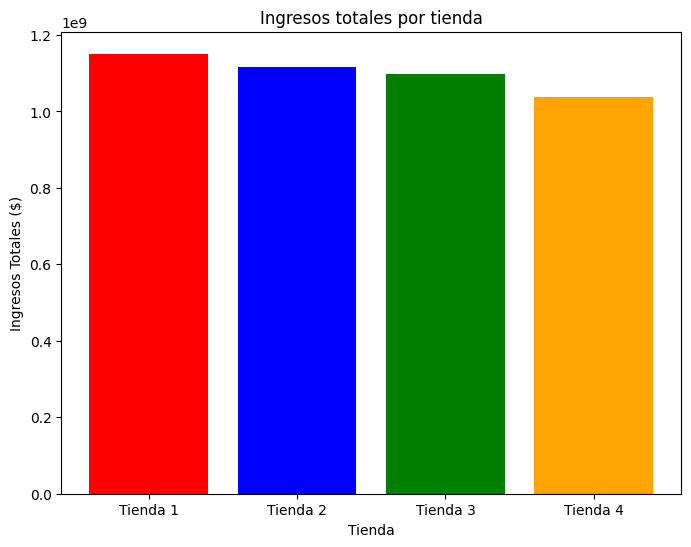

In [11]:
import matplotlib.pyplot as plt

# Create a dictionary of dataframes
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Calcular ingresos totales
ingresos_totales = {nombre: df["Precio"].sum() for nombre, df in tiendas.items()}

# Gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(ingresos_totales.keys(), ingresos_totales.values(), color=["red","blue","green","orange"])
plt.title("Ingresos totales por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos Totales ($)")
plt.show()

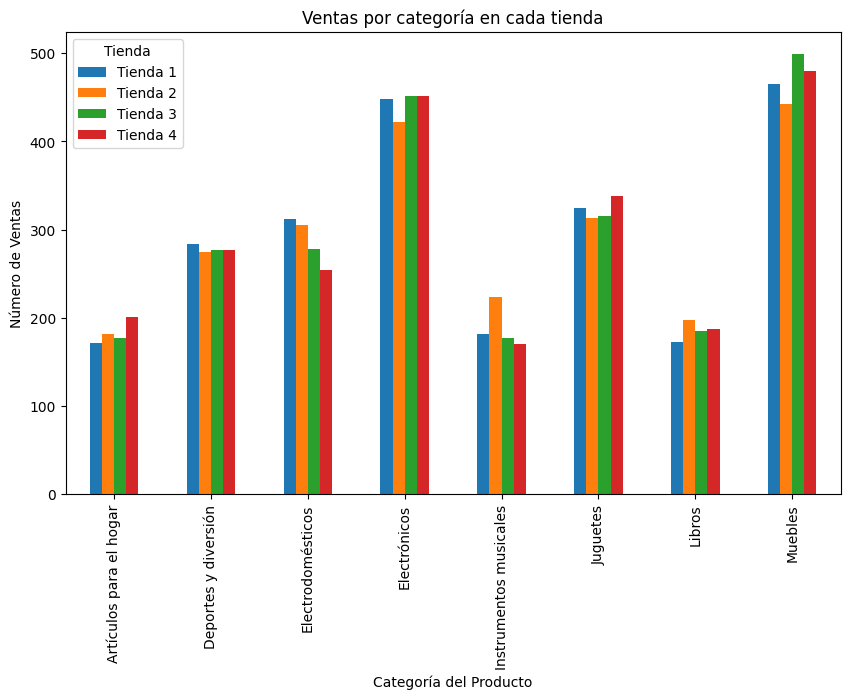

In [13]:
import pandas as pd

# Agrupar por categoría en cada tienda
ventas_categoria = {}
for nombre, df in tiendas.items():
    ventas_categoria[nombre] = df.groupby("Categoría del Producto")["Producto"].count()

# Convertir a DataFrame para comparar
ventas_categoria_df = pd.DataFrame(ventas_categoria).fillna(0)

# Gráfico apilado
ventas_categoria_df.plot(kind="bar", figsize=(10,6))
plt.title("Ventas por categoría en cada tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Número de Ventas")
plt.legend(title="Tienda")
plt.show()


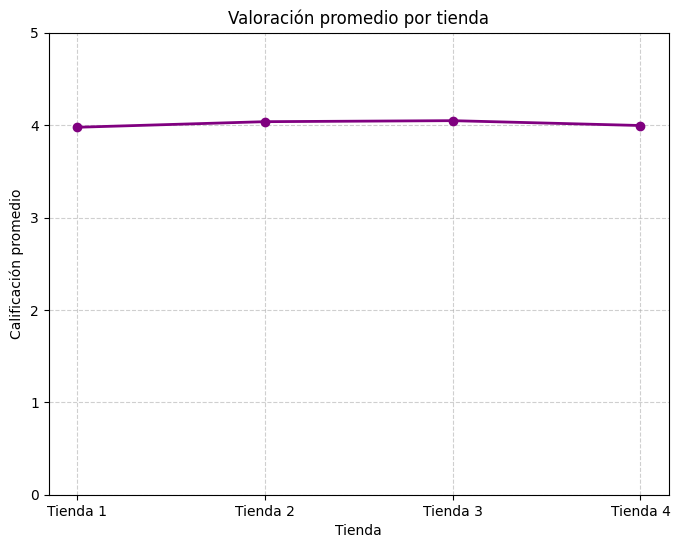

In [14]:
# Calcular calificación promedio
calificacion_prom = {nombre: df["Calificación"].mean() for nombre, df in tiendas.items()}

# Gráfico de líneas
plt.figure(figsize=(8,6))
plt.plot(list(calificacion_prom.keys()), list(calificacion_prom.values()), marker="o", linewidth=2, color="purple")
plt.title("Valoración promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.ylim(0,5)  # Escala de 0 a 5 estrellas
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Informe Final: Identificación de la Tienda Menos Eficiente

## Introducción
El presente análisis tiene como objetivo evaluar el rendimiento de cuatro tiendas (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) con el fin de identificar **cuál de ellas presenta menor eficiencia y debería ser vendida** por el Sr. Juan.  
La evaluación se ha realizado considerando los siguientes factores:
- Ingresos totales por tienda.
- Categorías de productos más y menos vendidas .
- Calificación promedio otorgada por los clientes.
- Productos más y menos vendidos.
- Costo de envío promedio.

A partir de estos indicadores y mediante el uso de visualizaciones, se busca comprender de forma integral el desempeño de cada tienda.

---

## Desarrollo del Análisis

### 1. Ingresos Totales
El gráfico de barras de ingresos totales evidenció que algunas tiendas presentan ventas significativamente mayores que otras.  
- **Tienda con mayores ingresos**: Tienda 1 .  
- **Tienda con menores ingresos**: Tienda 4 .

### 2. Categorías de Productos
Se analizaron las ventas por categoría .  
- La categoría más rentable de la mejor tienda fue **muebles de la tienda 4**, mientras que en la menos rentable apenas se destacaron **instrumentos musicales** y otras de bajo ticket promedio.  
- En la tienda con peor rendimiento, las categorías más vendidas no generan altos ingresos en comparación con las demás.

### 3. Calificación Promedio
Las calificaciones promedio mostraron diferencias en la satisfacción de los clientes.  
- **Mayor calificación**: Tienda 1 .  
- **Menor calificación**: Tienda 3 , evidenciando posibles problemas de calidad o servicio.

### 4. Productos Más y Menos Vendidos
En la tienda con mejor rendimiento, los productos más vendidos coinciden con los que generan más ingresos.  
En la tienda menos eficiente, los productos más vendidos no son necesariamente los más rentables, lo que sugiere una mala gestión del portafolio.

### 5. Costo de Envío Promedio
Un costo de envío elevado puede reducir la competitividad.  
- La tienda menos eficiente presenta un costo de envío promedio superior al de la competencia, afectando la satisfacción del cliente y la conversión de ventas.

---

## Conclusión y Recomendación
Con base en los indicadores analizados y las visualizaciones generadas, se concluye que **la Tienda 4** es la menos eficiente, ya que:
- Presenta **los ingresos más bajos**.
- Sus **categorías líderes no aportan ingresos significativos**.
- Tiene una **calificación promedio inferior** a la de las demás tiendas.
- El **costo de envío promedio es más alto**, lo que reduce su competitividad.
- Existe **desalineación entre los productos más vendidos y los más rentables**.

Por lo anterior, se recomienda que el Sr. Juan considere **vender la Tienda Y**, ya que su bajo rendimiento general y falta de ventajas competitivas dificultan su recuperación frente a las demás tiendas evaluadas.
